## Basics of meshgrid

In [130]:
import numpy as np
import pandas as pd

In [131]:
## Creating a meshgrid
X = np.array([1,2,3])
y = np.array([4,5,6,7])

XX,YY=np.meshgrid(X,y)

Meshgrid is important to evaluate functions on a grid. We can apply any function to the points of a meshgrid to plot a function.

#### Plotting a function using meshgrid

In [132]:
x = np.linspace(-40,40,100)
y = np.linspace(-50,50,90)
XX,YY=np.meshgrid(x,y)

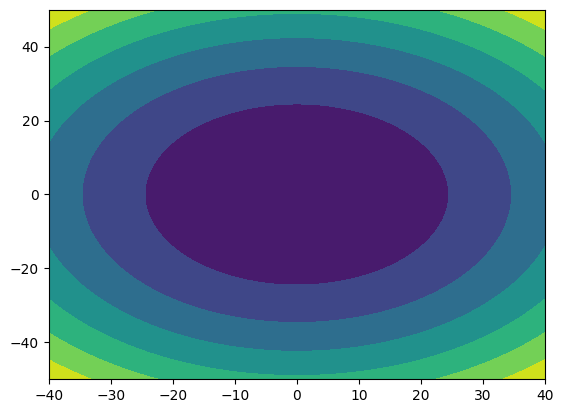

In [133]:
import matplotlib.pyplot as plt
z=(XX**2)+(YY**2)
plt.contourf(XX,YY,z)

In [134]:
import seaborn as sns

In [135]:
df = sns.load_dataset('iris')

In [136]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [137]:
df=df[['sepal_length','sepal_width','species']]

In [138]:
df.head()

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [139]:
df=df[df['species']!='setosa']

In [140]:
df.head()

,sepal_length,sepal_width,species
50,7.0,3.2,versicolor
51,6.4,3.2,versicolor
52,6.9,3.1,versicolor
53,5.5,2.3,versicolor
54,6.5,2.8,versicolor


In [141]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [142]:
df['species']=encoder.fit_transform(df['species'])

In [143]:
df.head()

,sepal_length,sepal_width,species
50,7.0,3.2,0
51,6.4,3.2,0
52,6.9,3.1,0
53,5.5,2.3,0
54,6.5,2.8,0


In [144]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [147]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [149]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## Steps

In [150]:
## Step 1 : Create meshgrid

In [151]:
a = np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b = np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)

XX,YY=np.meshgrid(a,b)

In [152]:
## Step 2: Classifying every point on the meshgrid

In [153]:
input_array=np.array([XX.ravel(),YY.ravel()]).T

In [162]:
labels=knn.predict(input_array)

In [163]:
#### Step 3 : Plotting the array as an image

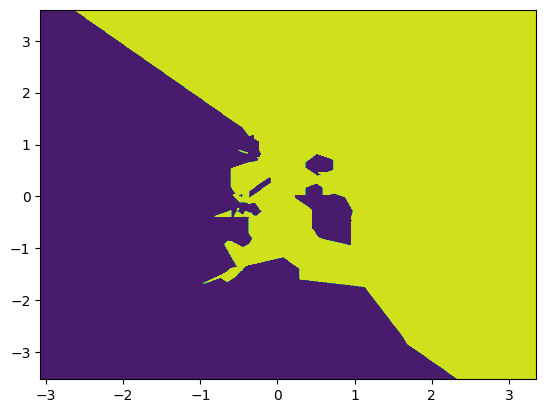

In [164]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

In [165]:
#### Step 5 : Plotting all the traing data on the plot

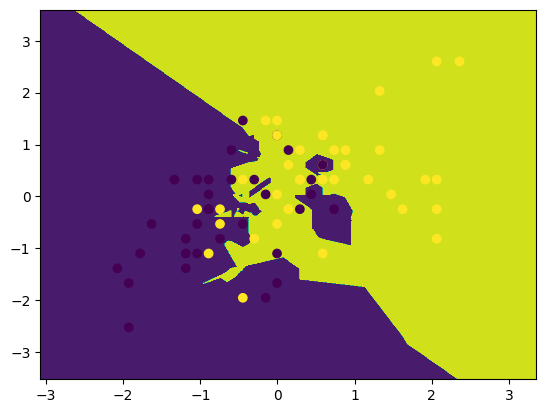

In [167]:
plt.contourf(XX,YY,labels.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)